In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: P0886070901M2S002SRSPEC001C.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.199e-03 +/- 4.691e-04 (64.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-9
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.975e+04 sec
 Using fit statistic: chi
 Using Background File                P0886070901M2S002BGSPEC001C.FTZ
  Background Exposure Time: 2.975e+04 sec
 Using Response (RMF) File            m2_e13_im_pall_o.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886070901M2S002SRCARF001C.FTZ



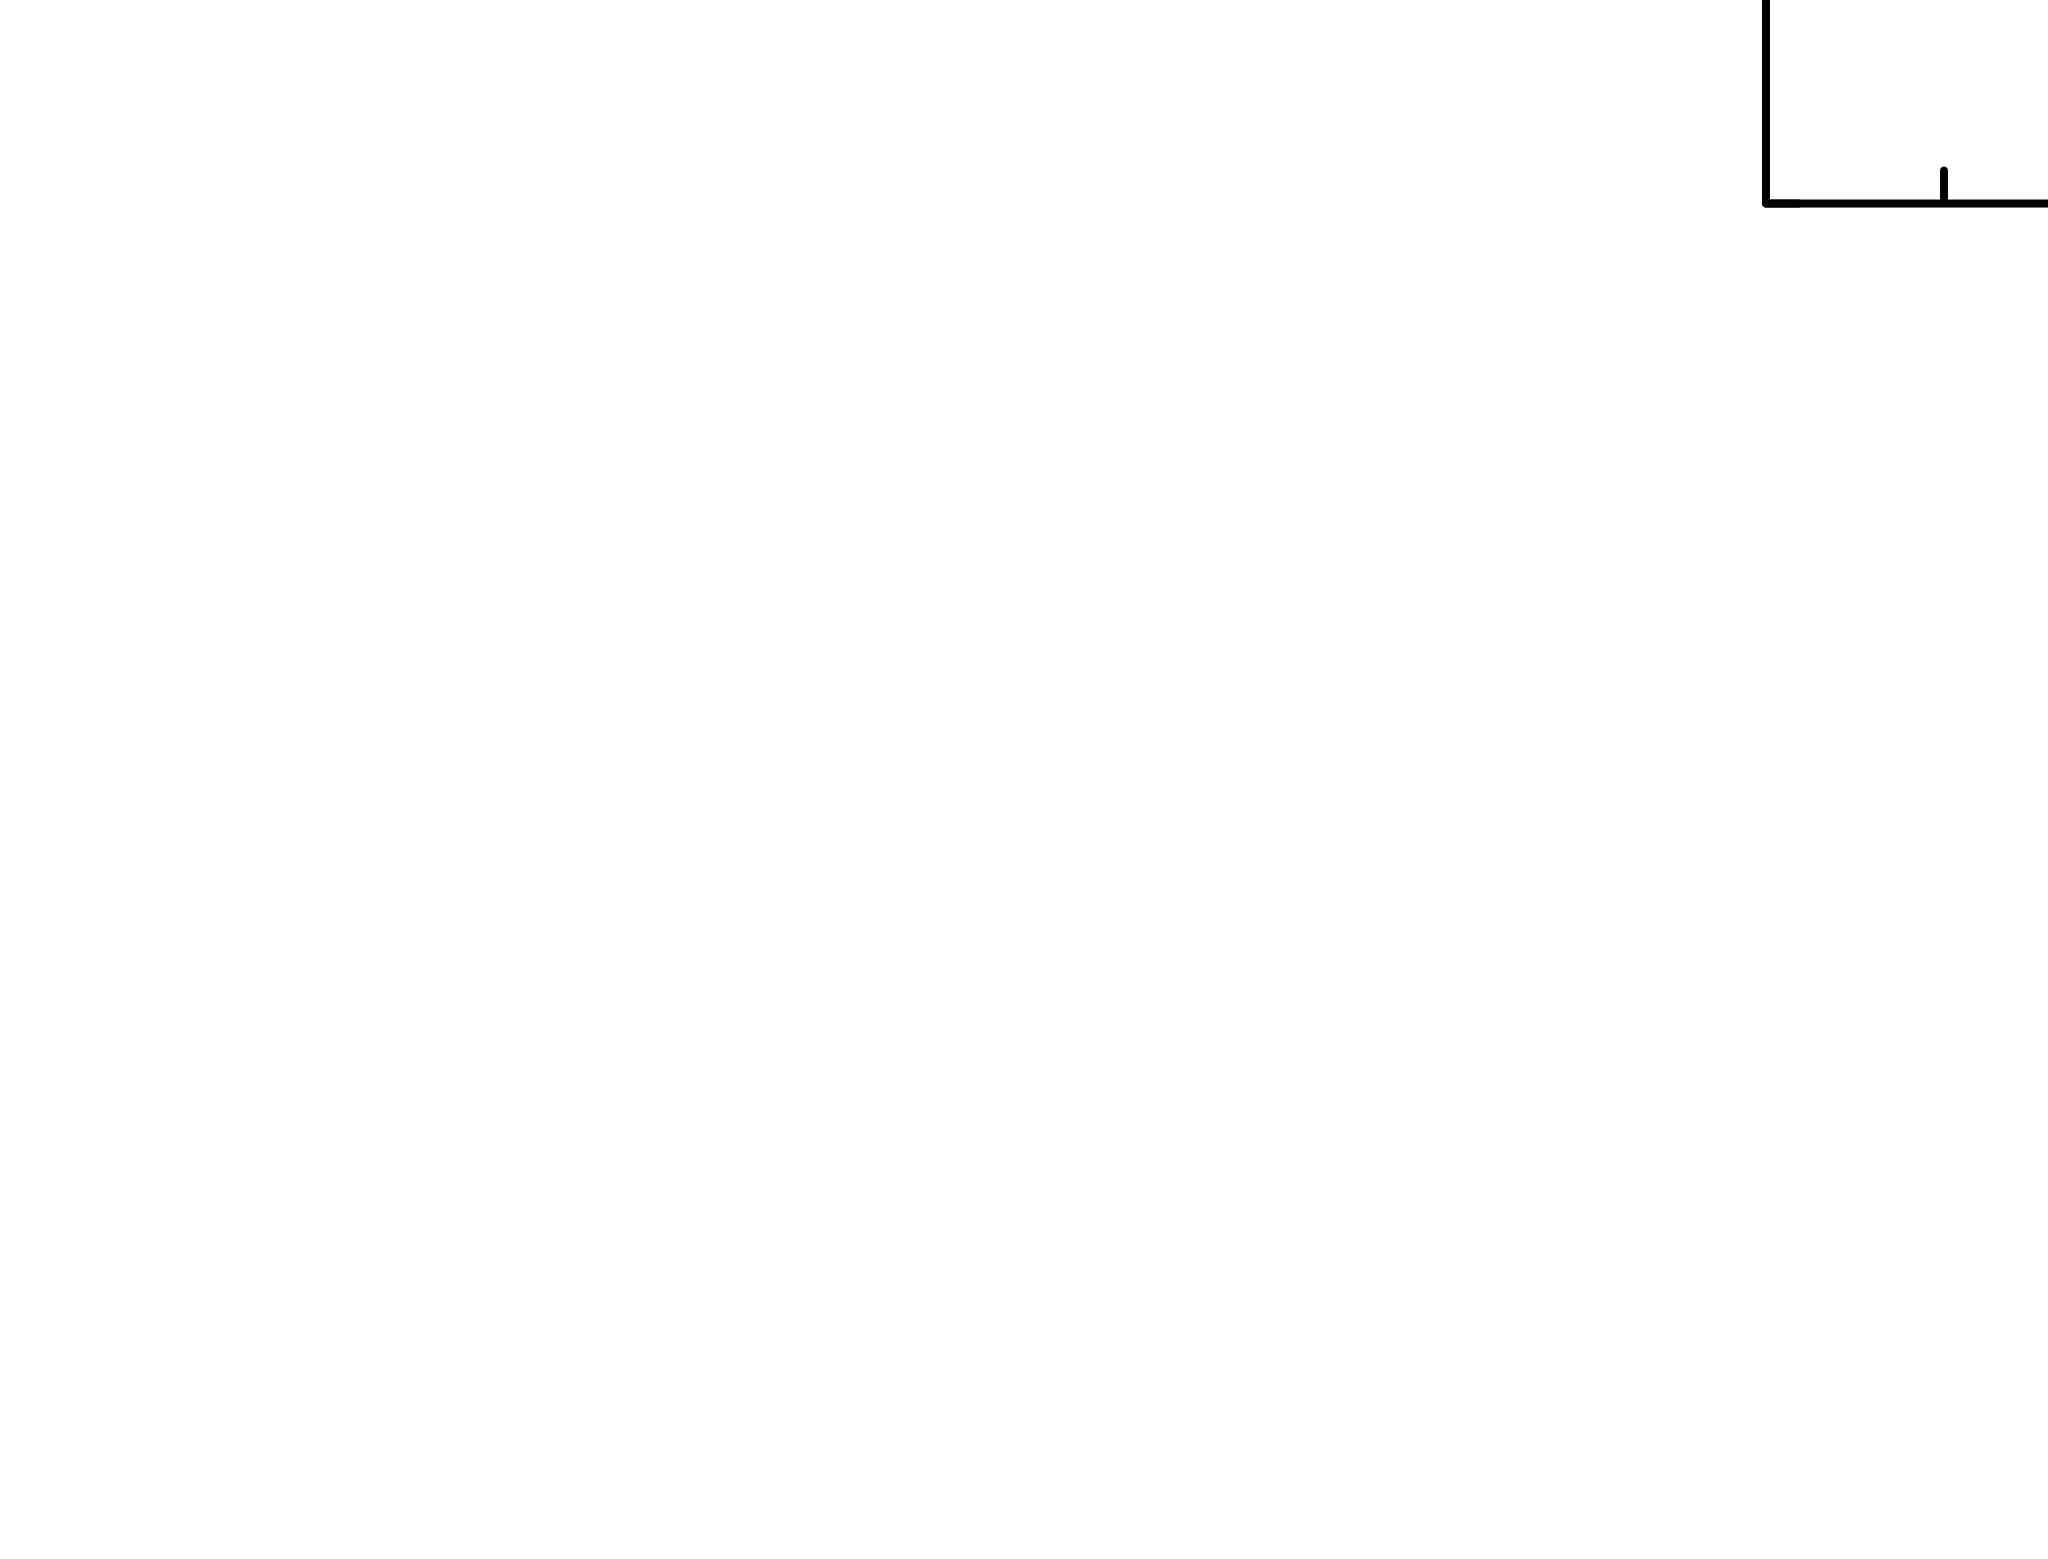

In [2]:
spec_fnames = glob.glob('P*70901M2S*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.002")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.202788e+11     using 9 bins.



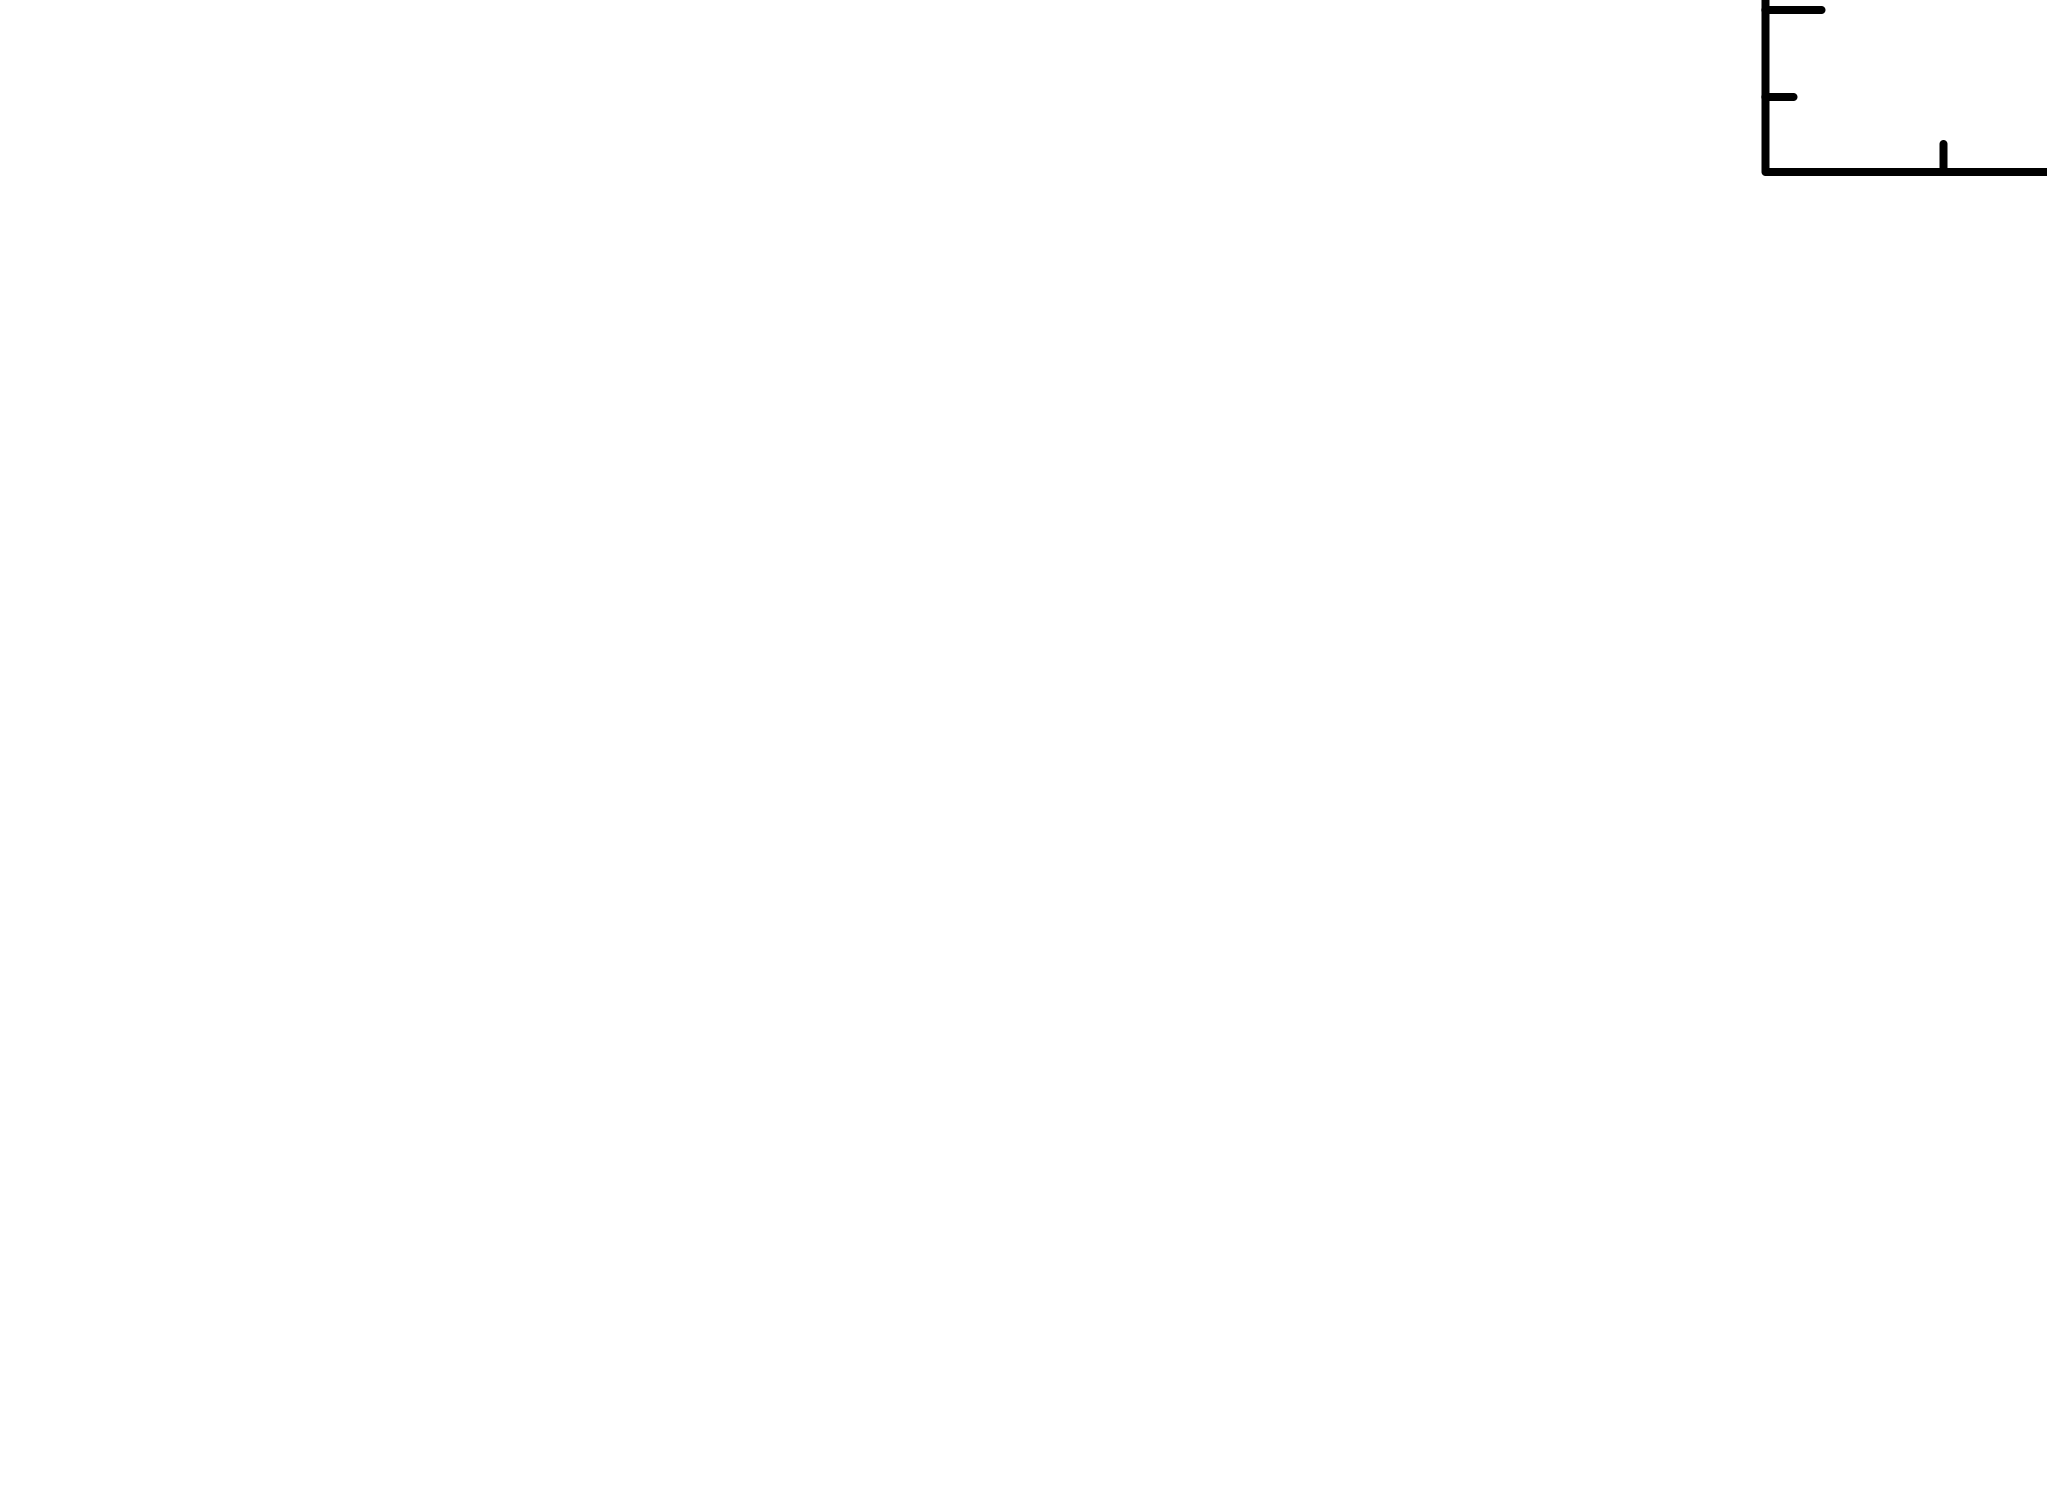

In [3]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.371240e+10     using 9 bins.

Test statistic : Chi-Squared              2.371240e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.843790e+10     using 9 bins.

Test statistic : Chi-Squared              1.843790e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.


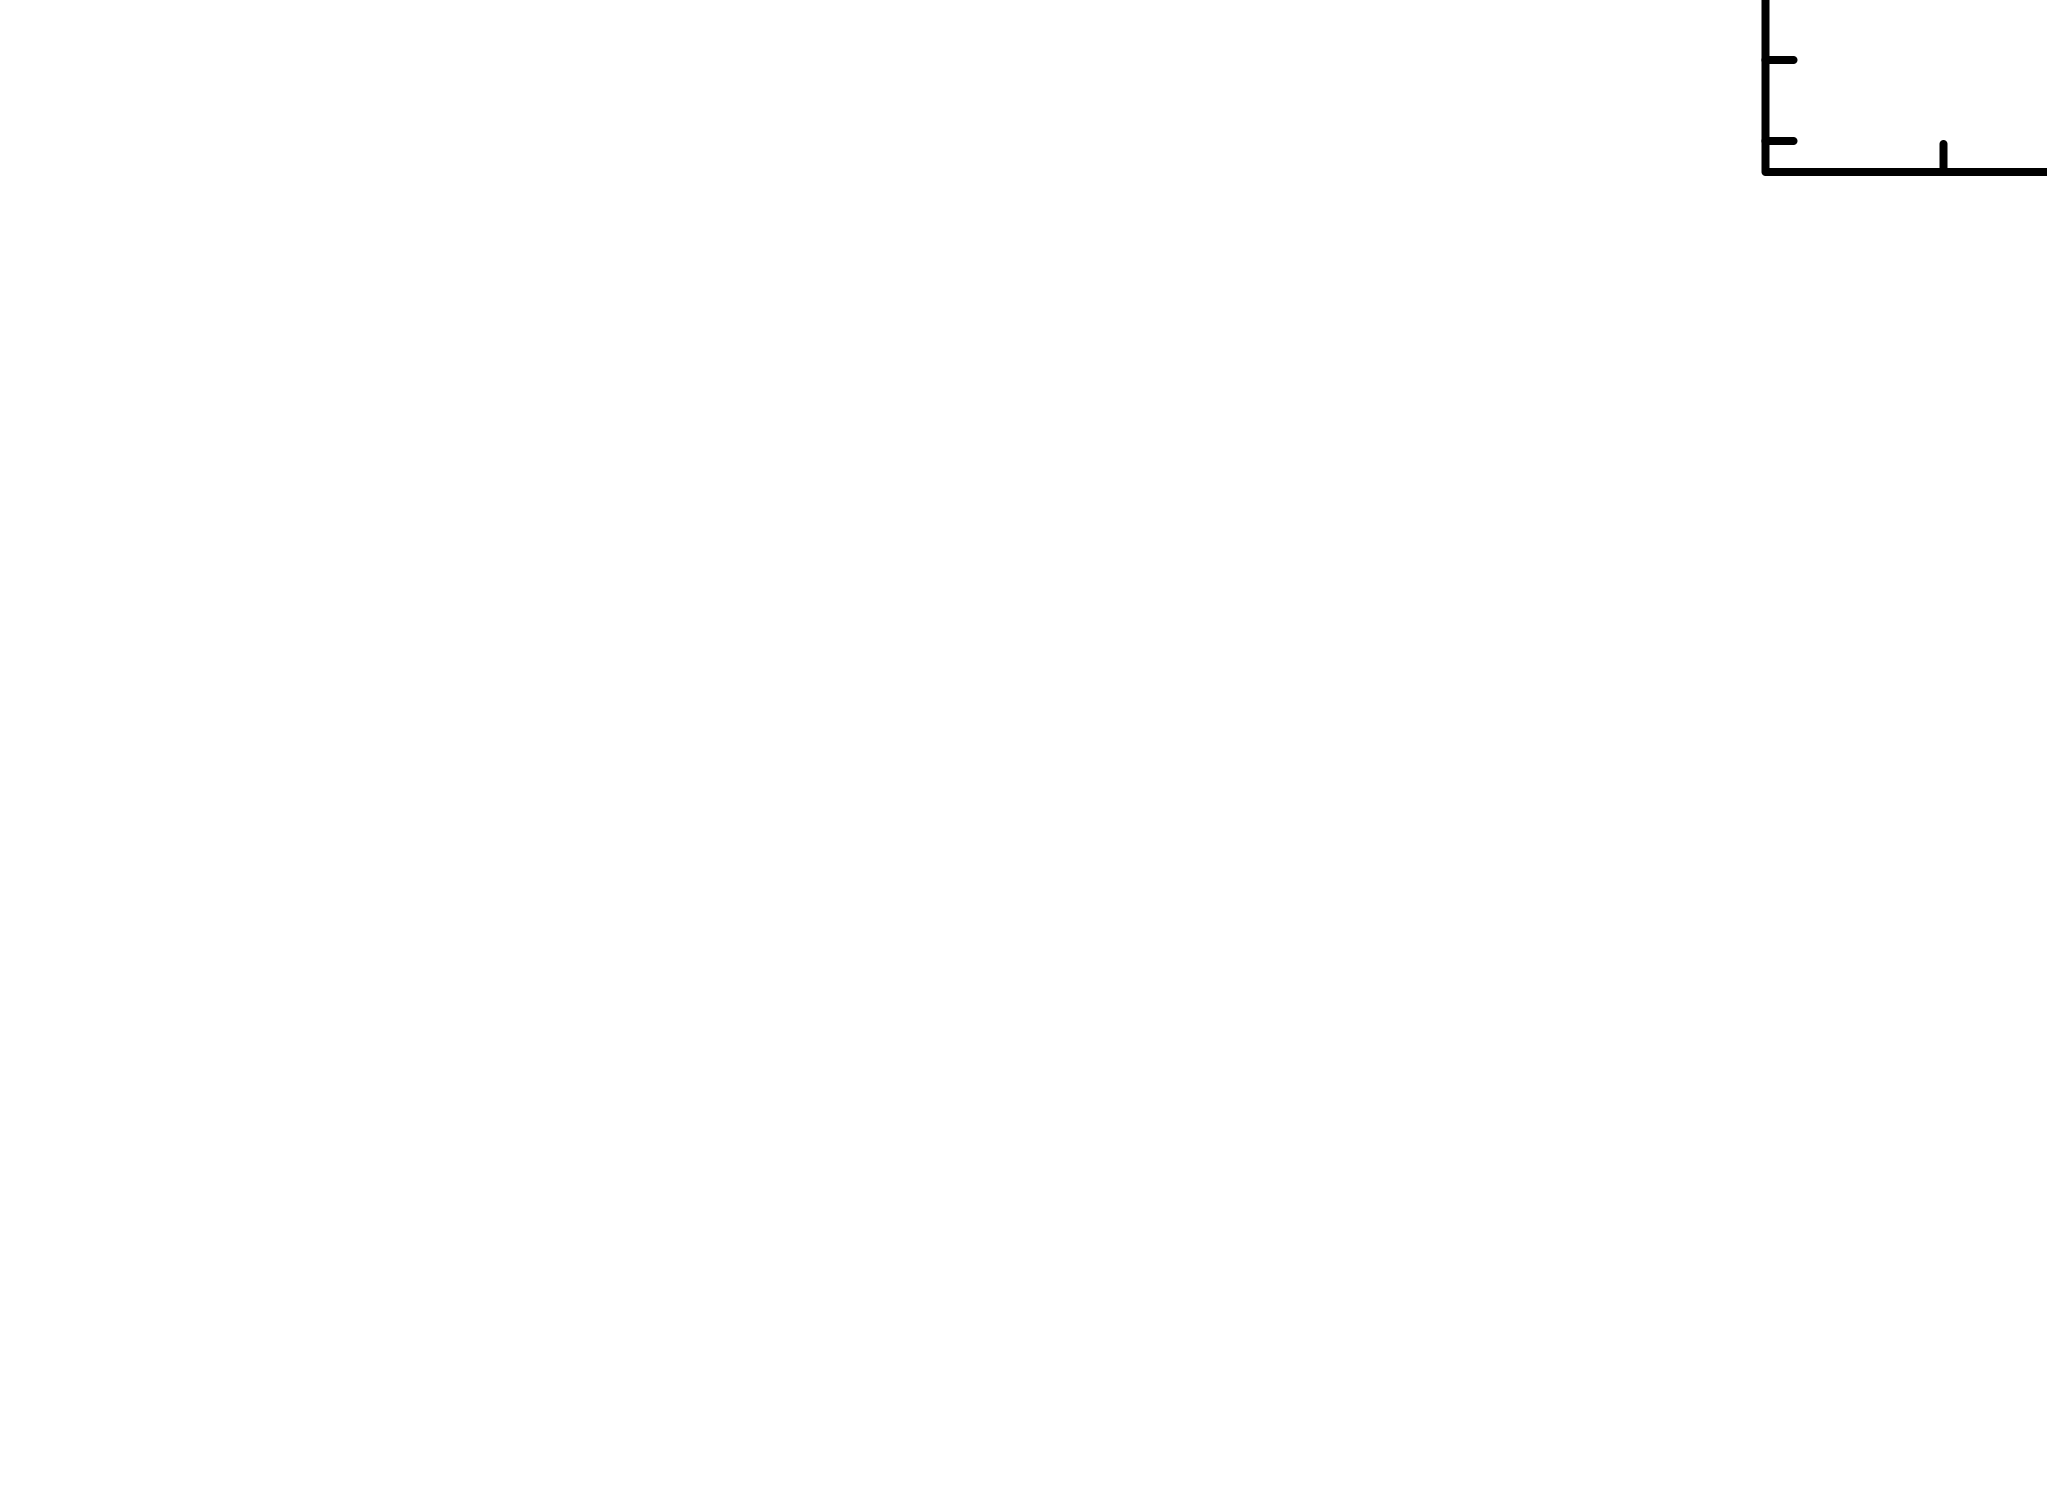

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
12.0511      2.44769      -1       1.13554       8.38701   4.52583e-05
9.08575      106652       -1      0.914117       28.5318   4.61046e-05
4.34375      100848       -2      0.775682       198.657   8.51451e-05
3.19295      14025.5      -1      0.970478       197.735   9.37728e-05
2.85768      11071.7      -1       1.07158       197.003   9.97974e-05
2.79325      4447.24      -1       1.11477       197.619   0.000103485
2.78762      825.209       0       1.12343       197.781   0.000103633
2.78469      324.573       0       1.12967       197.903   0.000103812
2.78294      151.682       0       1.13433       198.011   0.000103992
2.78184      139.292       0       1.13792       198.110   0.000104160
2.78112      194.811       0       1.14075       198.204   0.000104309
2.78065      277.339       0       1.14303       198.294   0.000104440
2.78034      363.853       0   

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
mo.bremss.kT = 4.0
Fit.perform()
Plot("data resid")

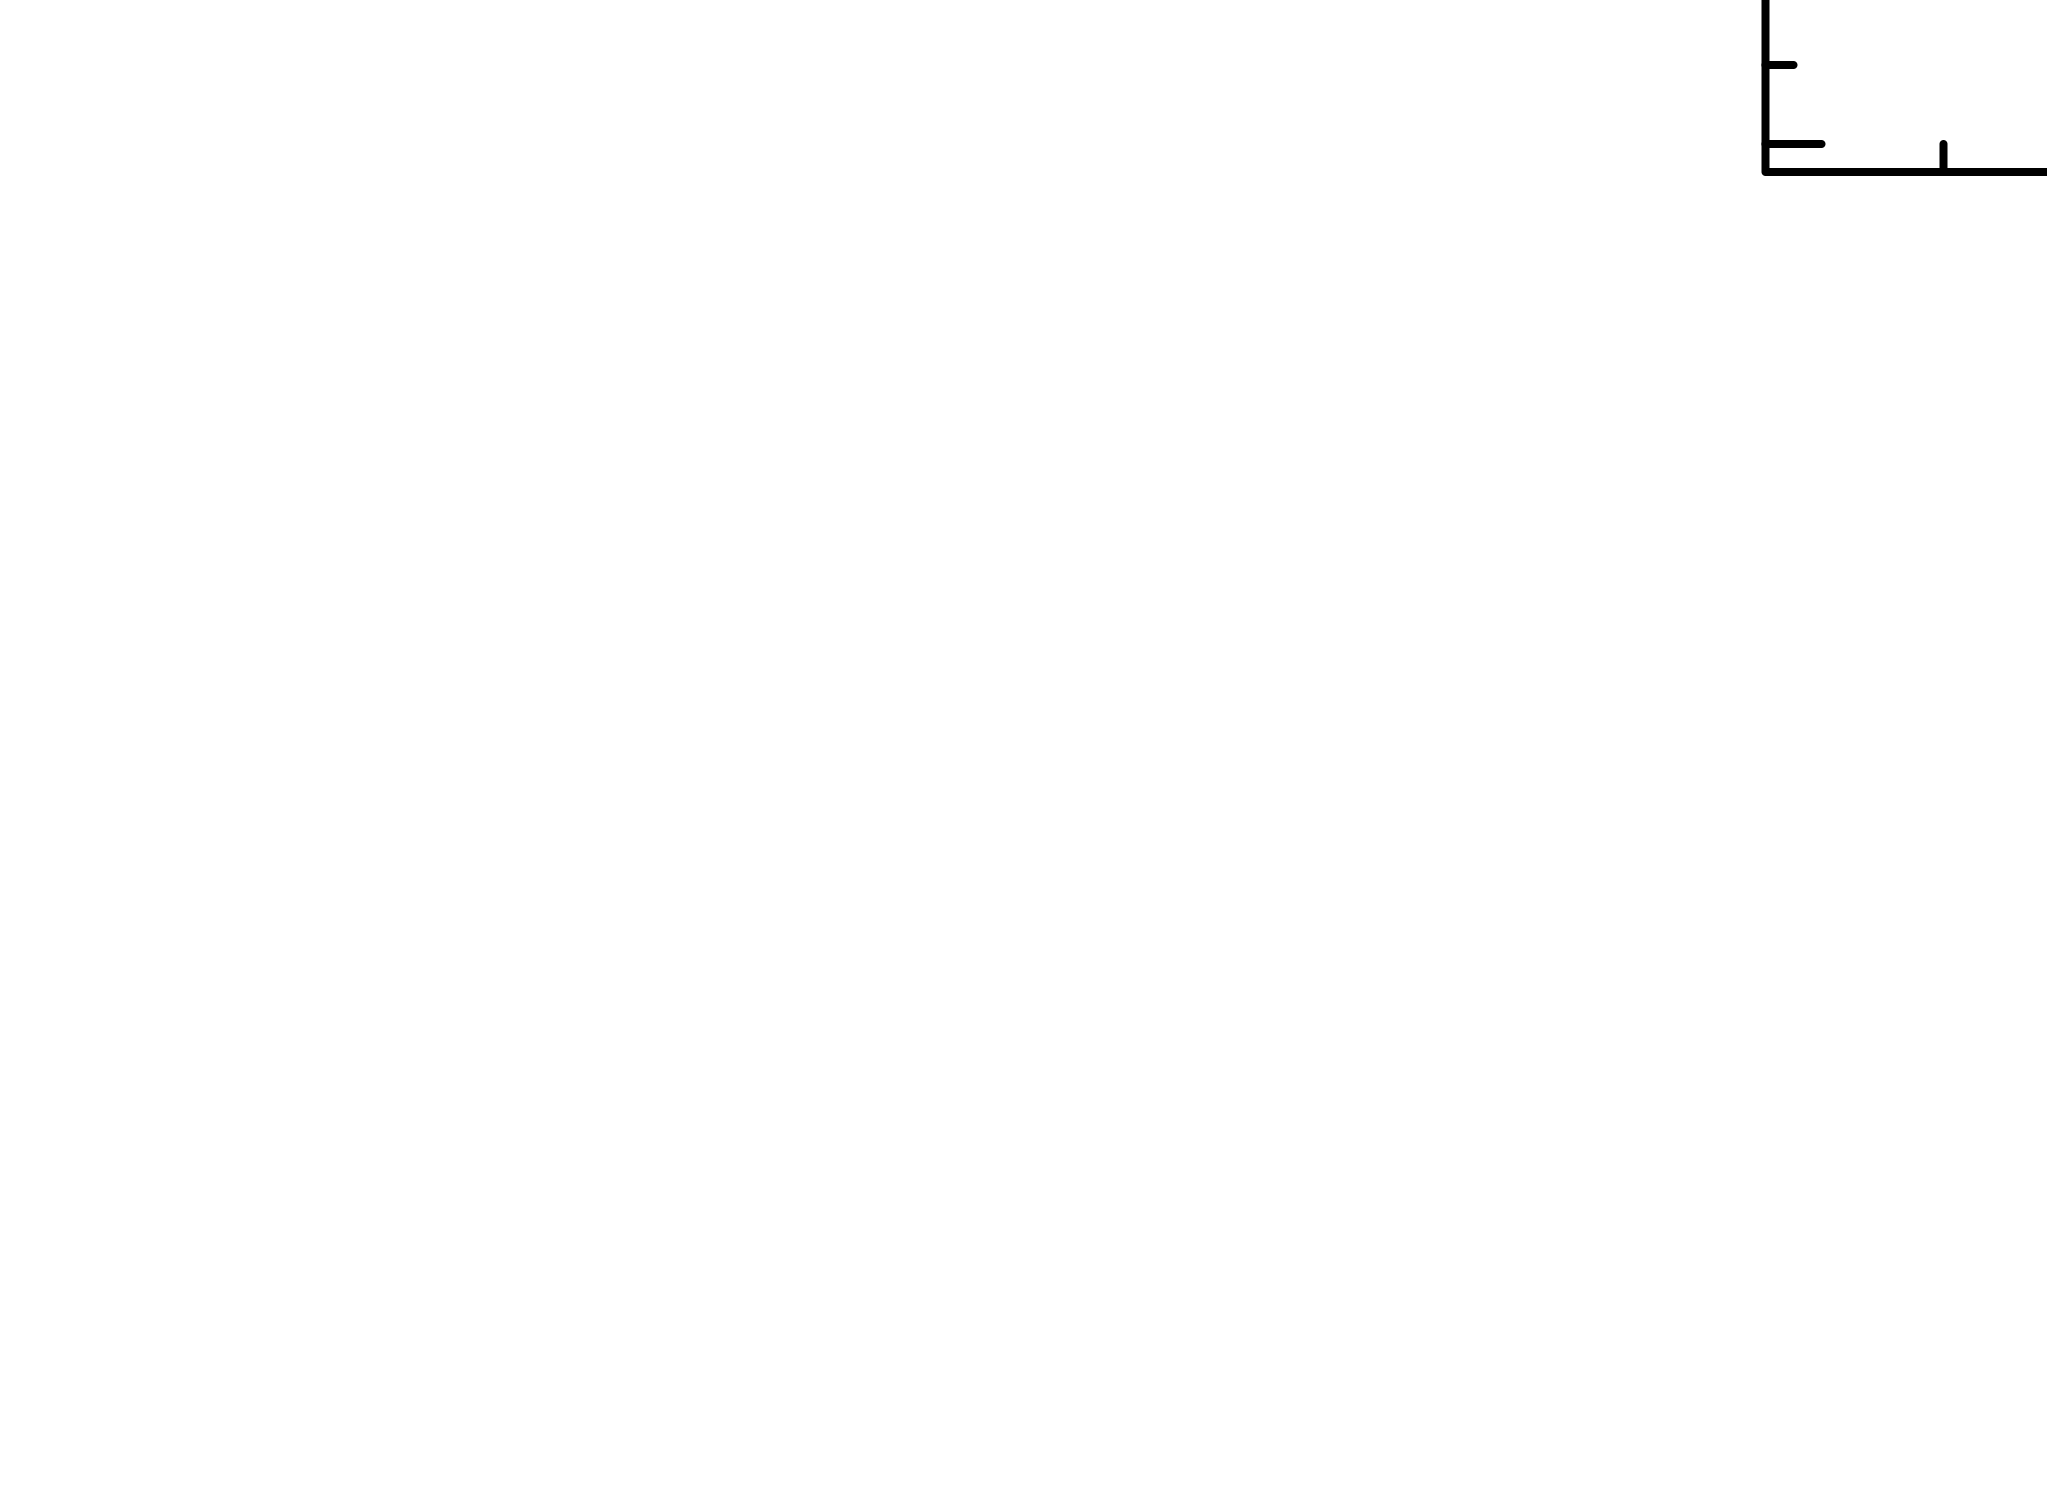


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.354127e+09     using 9 bins.

Test statistic : Chi-Squared              6.354127e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
46.7508      6.50402      -1      0.969705       2.64364   5.2

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.067589e+11     using 9 bins.

Test statistic : Chi-Squared              4.067589e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
16.8486      1.77686      -1      0.121755       3.12079   9.64828e-06
8.43222      493728       -1    0.00780110       2.71328   8.96180e-06
6.52068      221466       -1   6.82762e-05       2.46810   7.69721e-06
6.35

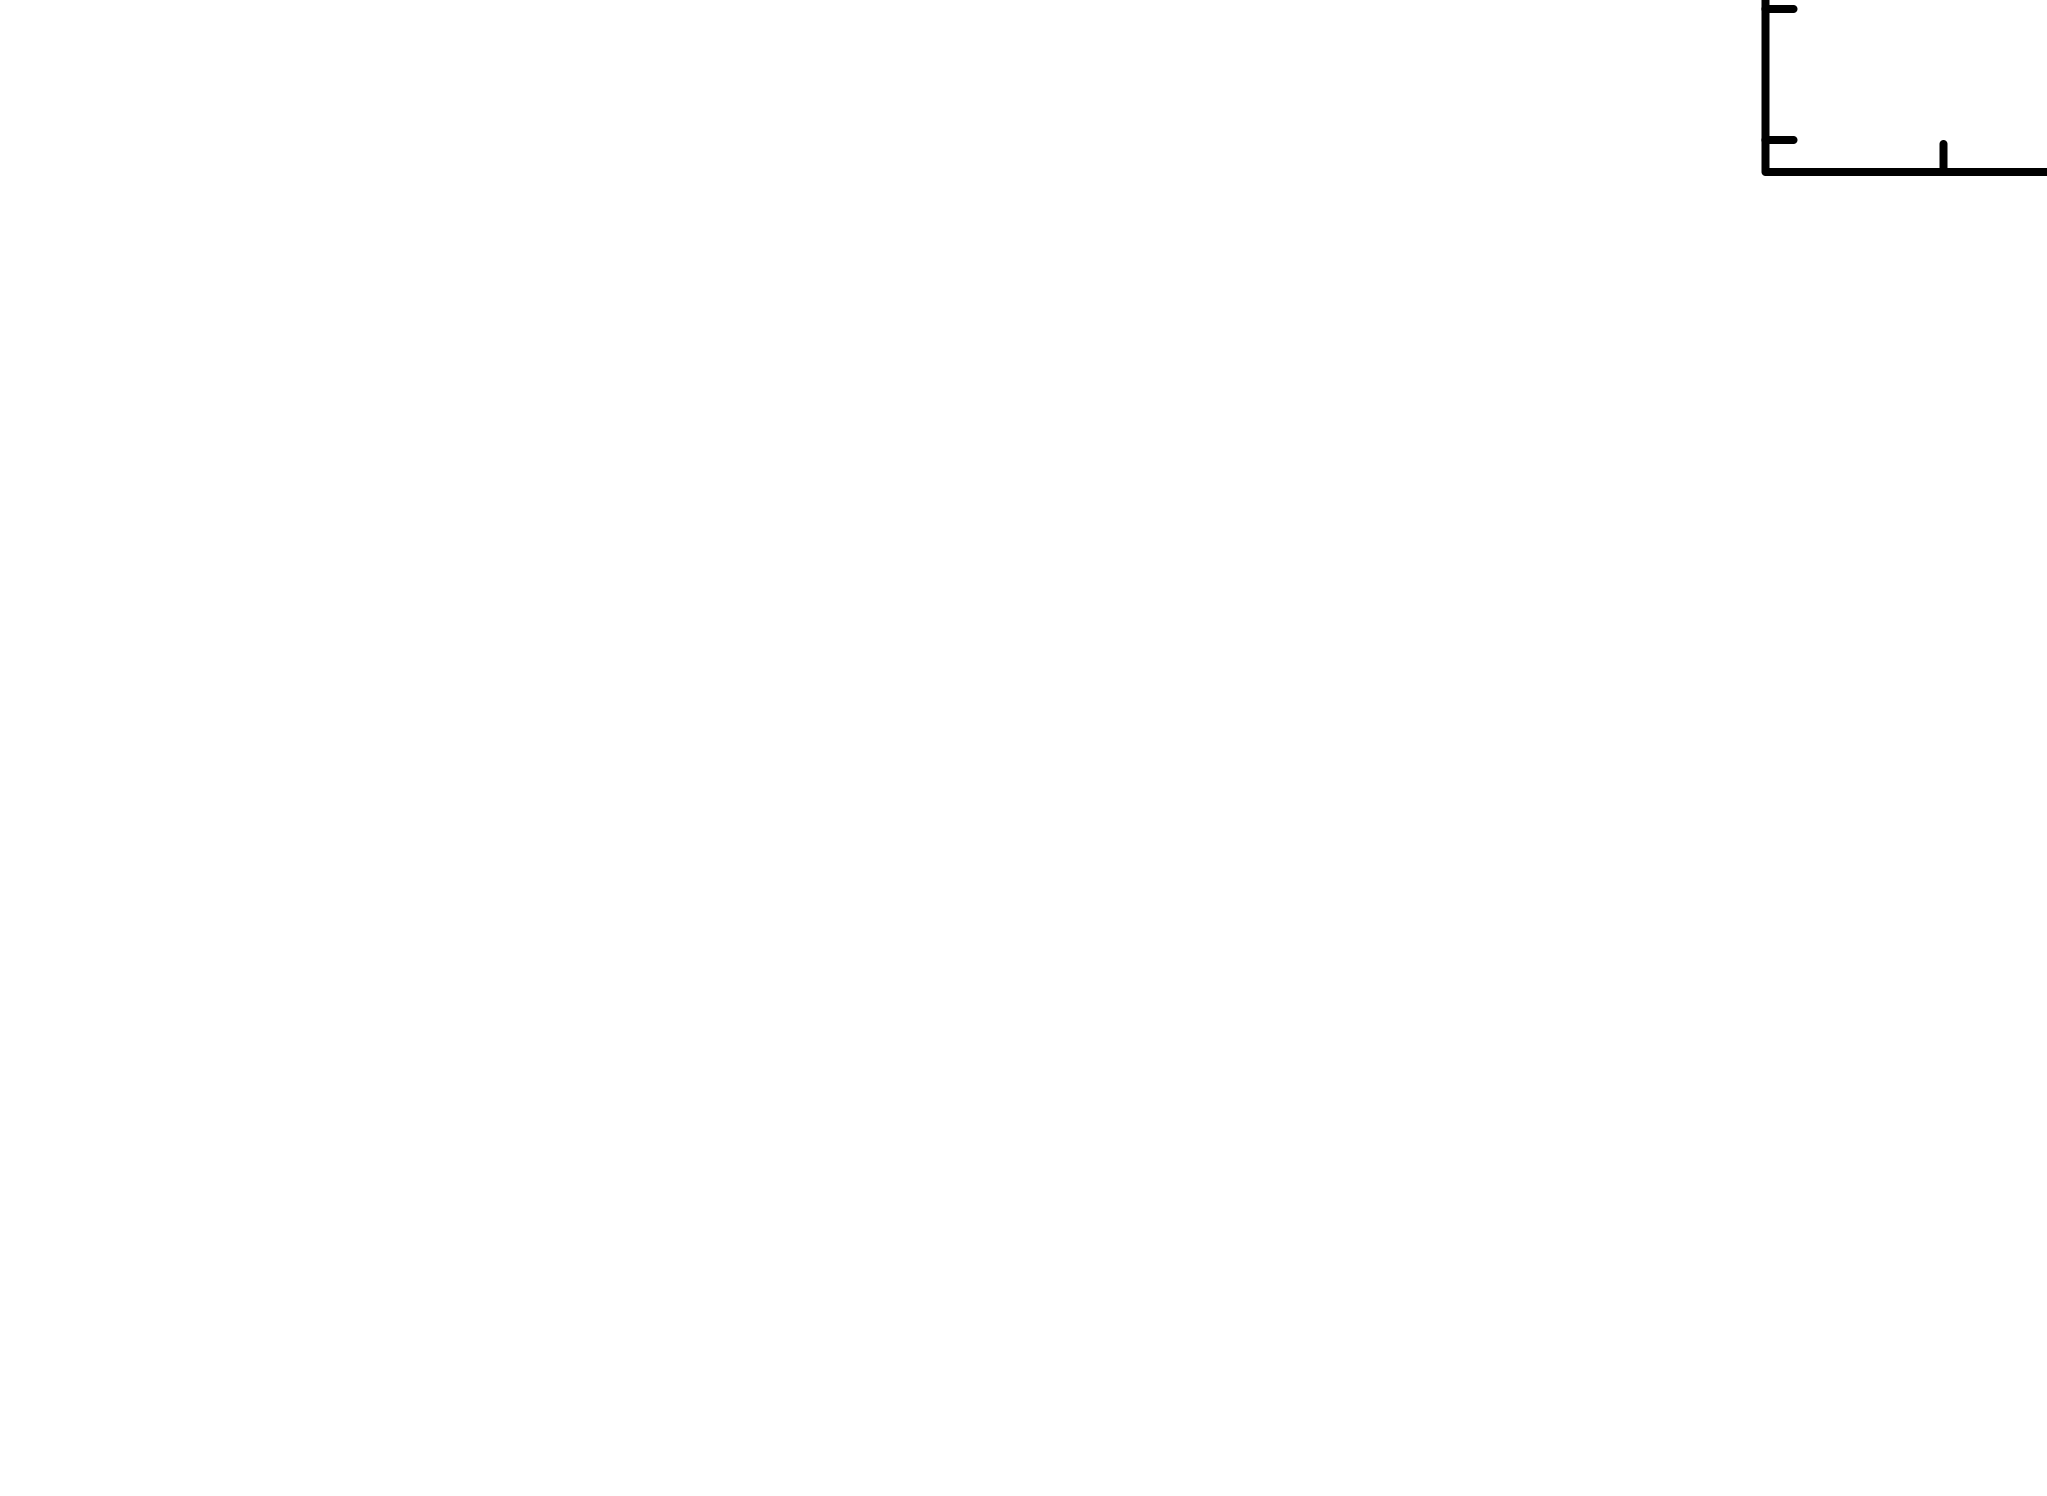

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".1 12.0")

 Model Flux 4.2893e-05 photons (2.8947e-13 ergs/cm^2/s) range (0.10000 - 12.000 keV)


In [8]:
plx = 0.9566
d_kpc = 1/plx
F_x = 2.3933*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.128368257471568e+31


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.0453690152623876
31.4953178705944


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.68)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.4099032091947575e-13
F_x / F_opt:  0.22980784174091323



Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.319300e+09     using 9 bins.

Test statistic : Chi-Squared              4.319300e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.007553e+08     using 9 bins.

Test statistic : Chi-Squared              9.007553e+08     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degree

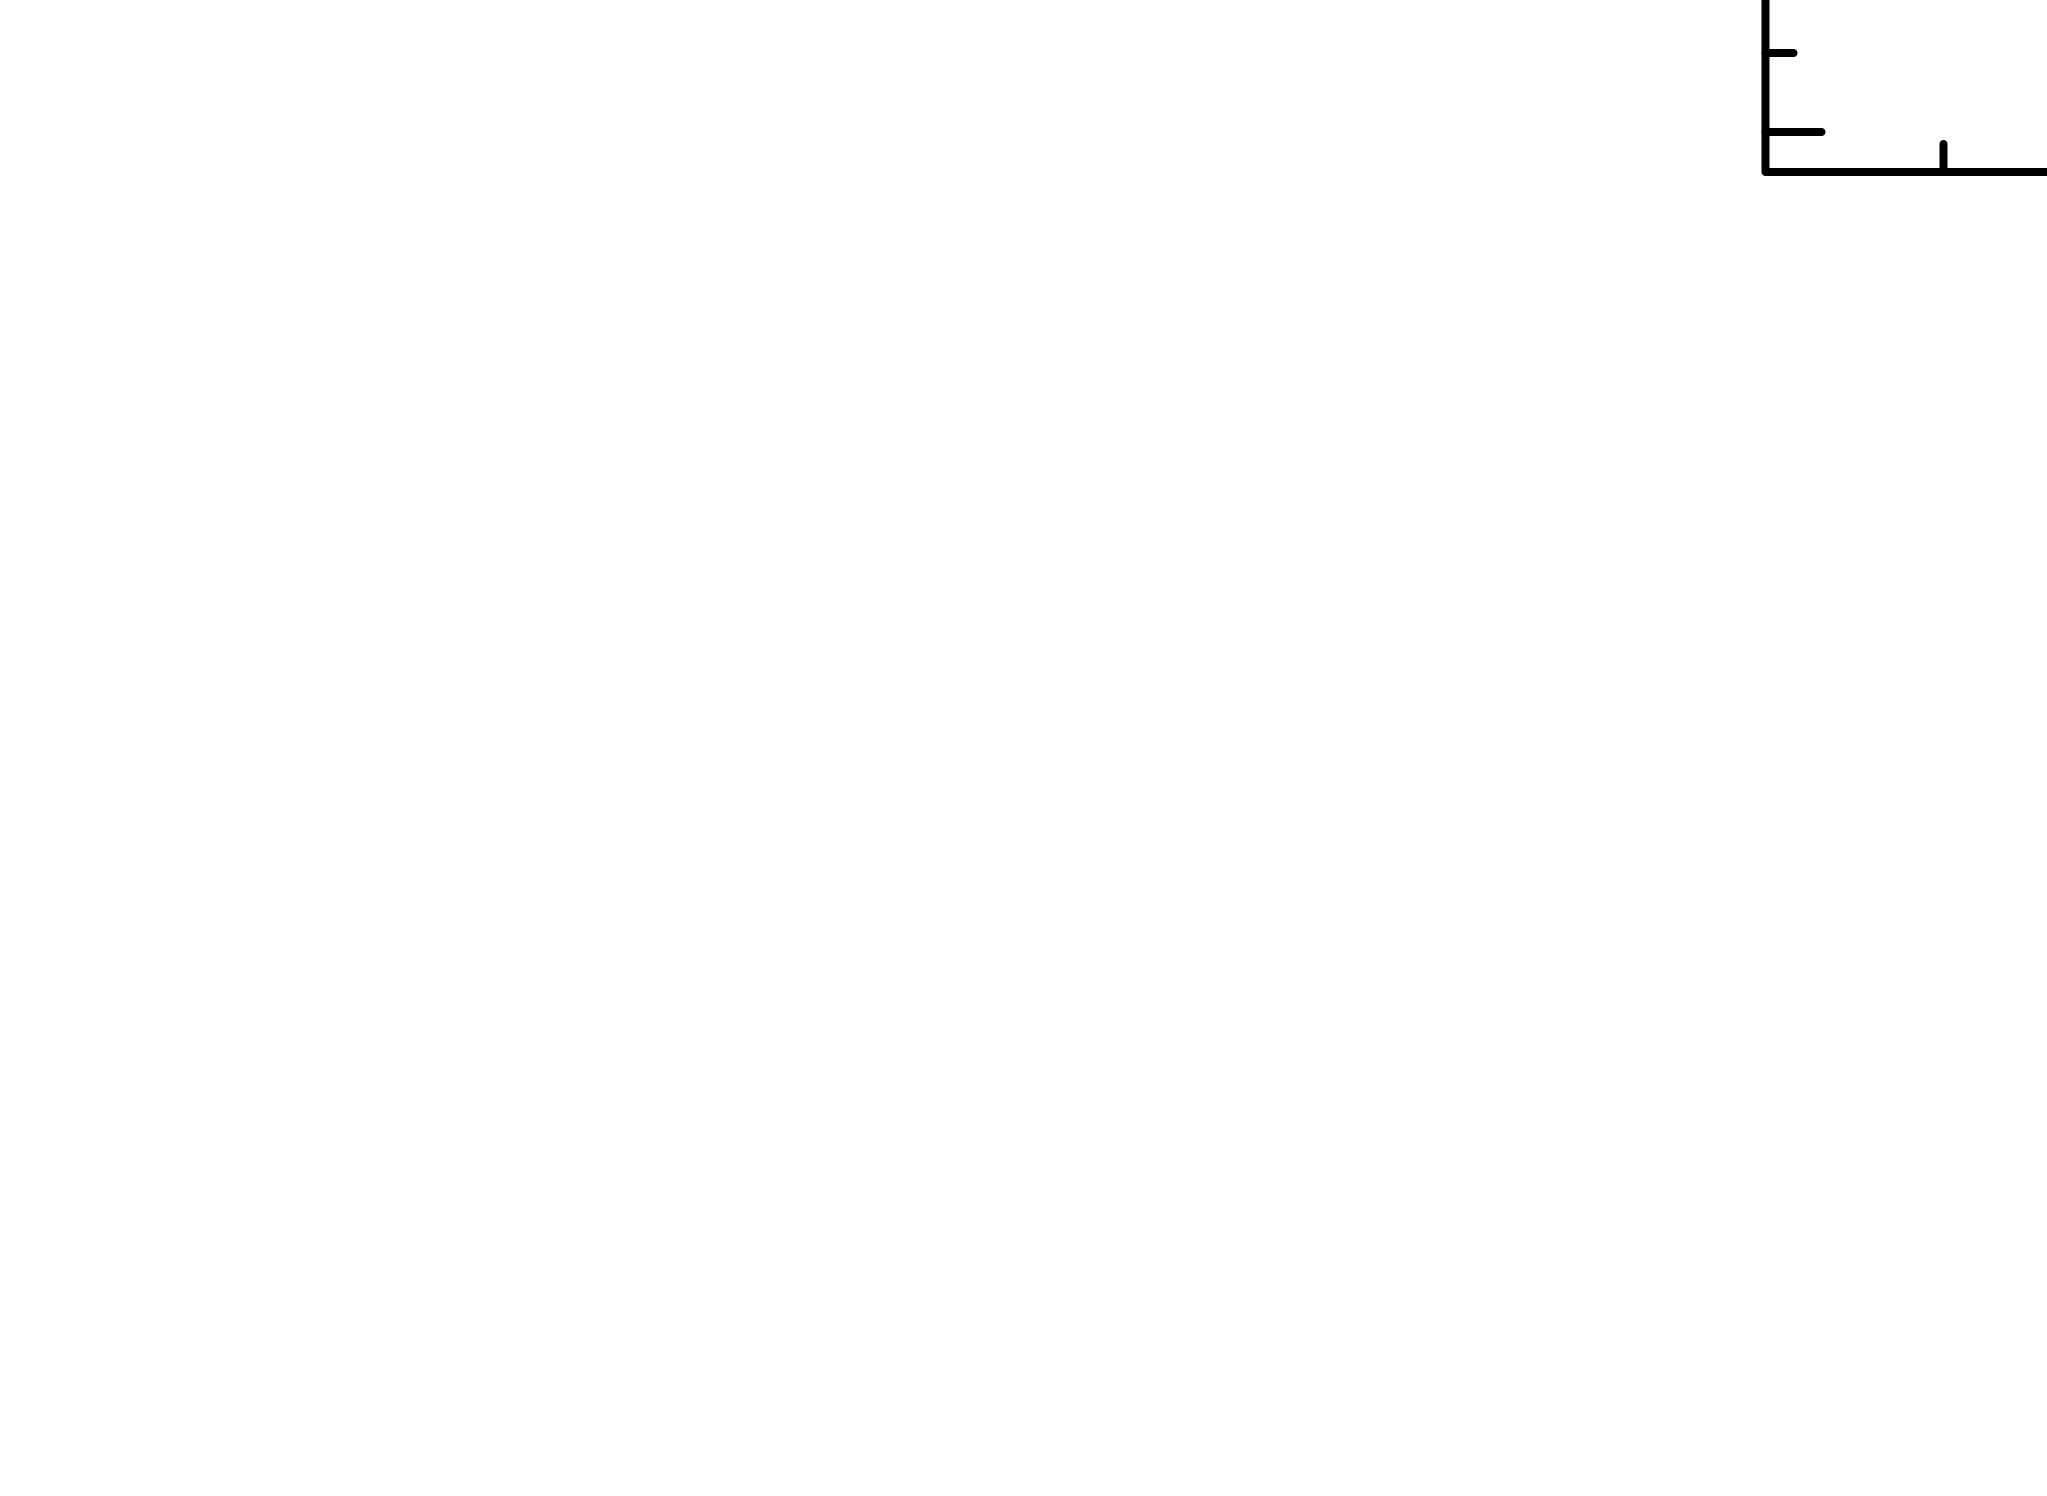

In [11]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc=0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.354127e+09     using 9 bins.

Test statistic : Chi-Squared              6.354127e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.171036e+09     using 9 bins.

Test statistic : Chi-Squared              1.171036e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees o

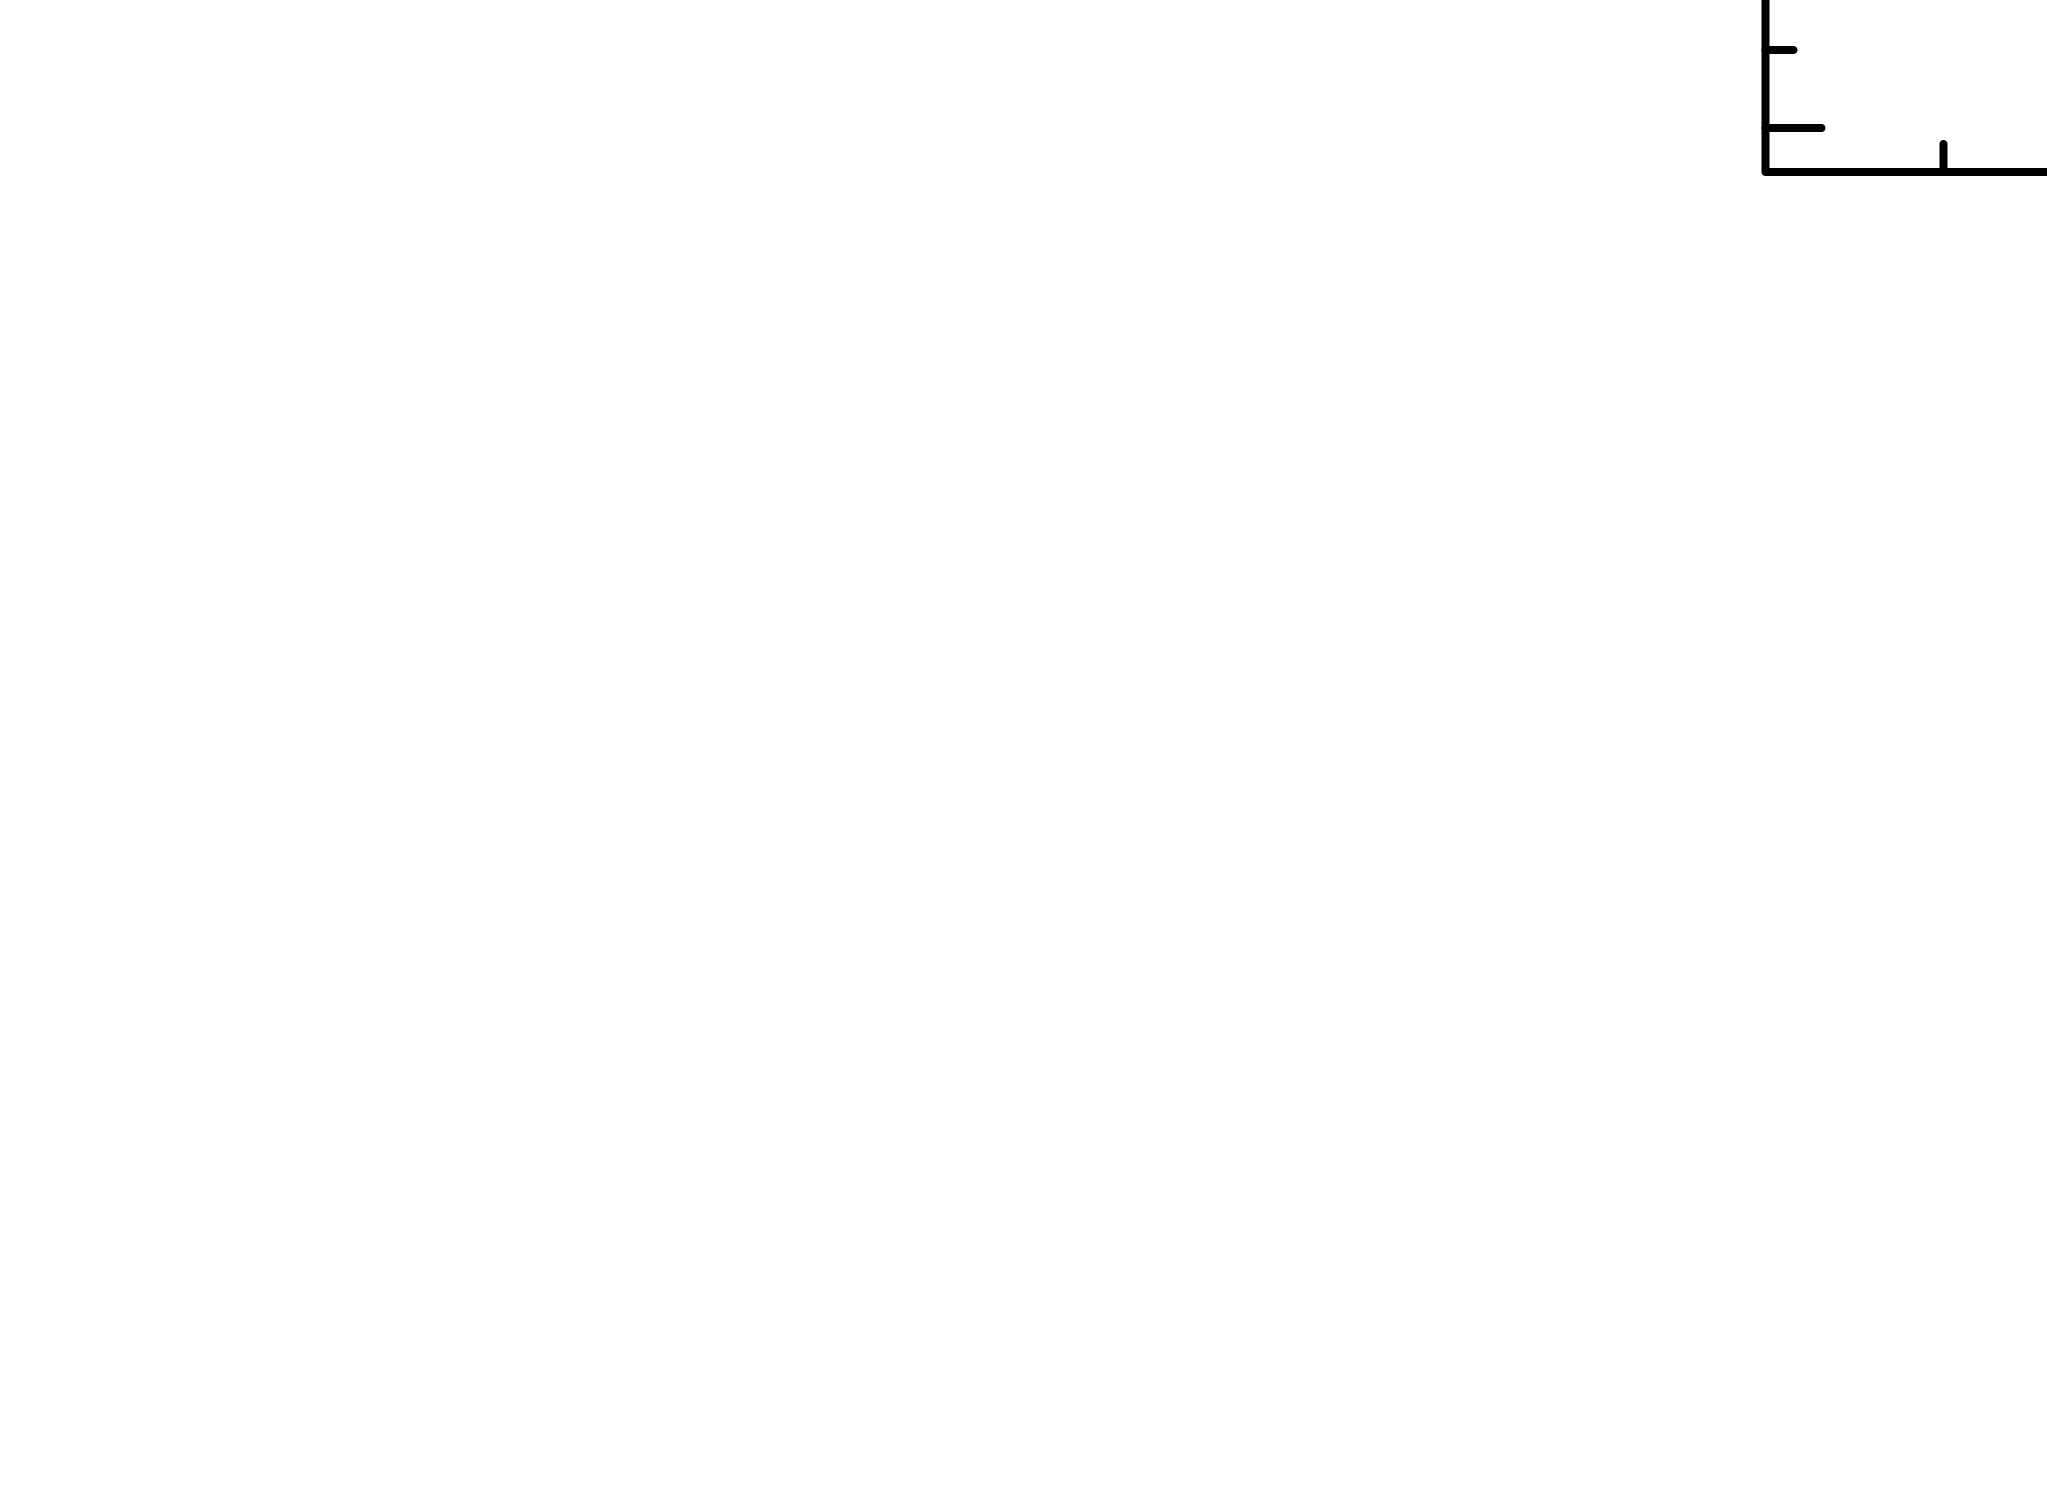

In [12]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc=0.3
Fit.perform()
Plot("data resid")